# Author: Souhardya Das

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

## Dataset

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 500

# Generate synthetic student data
data = {
    'student_id': range(1, n_students + 1),

    # Study hours per week (realistic range: 5-40 hours)
    'study_hours_per_week': np.random.randint(5, 41, n_students),

    # Attendance percentage (60-100%)
    'attendance_percentage': np.random.randint(60, 101, n_students),

    # Previous semester score (40-95)
    'previous_score': np.random.randint(40, 96, n_students),

    # Assignments completed (0-20)
    'assignments_completed': np.random.randint(0, 21, n_students),

    # Total assignments (always 20)
    'total_assignments': 20,

    # Sleep hours per day (4-9 hours)
    'sleep_hours': np.random.randint(4, 10, n_students),

    # Participation in class (1-10 scale)
    'class_participation': np.random.randint(1, 11, n_students),

    # Internet quality at home (1=Poor, 5=Excellent)
    'internet_quality': np.random.randint(1, 6, n_students),

    # Extracurricular activities hours per week
    'extracurricular_hours': np.random.randint(0, 16, n_students)
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate assignment completion rate
df['assignment_completion_rate'] = (df['assignments_completed'] / df['total_assignments']) * 100

# Generate target variable (Final Score) with realistic correlations
# Formula considers multiple factors with weights
df['final_score'] = (
    0.3 * df['previous_score'] +                    # 30% weight to previous performance
    0.25 * (df['study_hours_per_week'] * 2) +       # 25% weight to study hours
    0.2 * df['attendance_percentage'] * 0.8 +       # 20% weight to attendance
    0.15 * (df['assignments_completed'] * 4) +      # 15% weight to assignments
    0.1 * (df['class_participation'] * 8) +         # 10% weight to participation
    np.random.normal(0, 5, n_students)              # Add some random noise
)

# Normalize final score to be between 0-100
df['final_score'] = df['final_score'].clip(0, 100).round(2)

# Create grade categories
def assign_grade(score):
    if score >= 90:
        return 'A+'
    elif score >= 80:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'F'

df['grade'] = df['final_score'].apply(assign_grade)

# Save to CSV
df.to_csv('student_performance.csv', index=False)

print("Dataset created successfully!")


Dataset created successfully!


In [ ]:
df.head()

,student_id,study_hours_per_week,attendance_percentage,previous_score,assignments_completed,total_assignments,sleep_hours,class_participation,internet_quality,extracurricular_hours,assignment_completion_rate,final_score,grade
0,1,33,79,93,17,20,7,7,3,12,85.0,71.89,B
1,2,19,87,61,5,20,7,9,1,2,25.0,56.53,D
2,3,12,67,67,4,20,6,9,4,0,20.0,45.78,F
3,4,25,100,79,15,20,9,8,3,5,75.0,75.16,B
4,5,23,98,88,12,20,9,10,4,15,60.0,61.52,C


## EDA

In [ ]:
print(f"\nDataset shape: {df.shape}")
print(f"\nGrade distribution:")
print(df['grade'].value_counts().sort_index())


Dataset shape: (500, 13)

Grade distribution:
grade
A      3
B     37
C    128
D    198
F    134
Name: count, dtype: int64


In [ ]:
print(f"\nDataset statistics:")
df.describe()


Dataset statistics:


,student_id,study_hours_per_week,attendance_percentage,previous_score,assignments_completed,total_assignments,sleep_hours,class_participation,internet_quality,extracurricular_hours,assignment_completion_rate,final_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,23.396000,80.020000,68.216000,9.932000,20.0,6.54800,5.612000,3.046000,7.336000,49.660000,55.692200
std,144.481833,10.688671,12.032338,16.157087,6.007625,0.0,1.68326,2.786572,1.433874,4.403395,30.038125,10.073126
min,1.000000,5.000000,60.000000,40.000000,0.000000,20.0,4.00000,1.000000,1.000000,0.000000,0.000000,31.250000
25%,125.750000,14.000000,69.000000,55.000000,5.000000,20.0,5.00000,3.000000,2.000000,4.000000,25.000000,49.027500
50%,250.500000,24.500000,80.500000,69.000000,10.000000,20.0,7.00000,6.000000,3.000000,8.000000,50.000000,55.755000
75%,375.250000,32.250000,90.000000,82.000000,15.000000,20.0,8.00000,8.000000,4.000000,11.000000,75.000000,62.550000
max,500.000000,40.000000,100.000000,95.000000,20.000000,20.0,9.00000,10.000000,5.000000,15.000000,100.000000,82.530000


In [ ]:
df.dtypes

,0
student_id,int64
study_hours_per_week,int64
attendance_percentage,int64
previous_score,int64
assignments_completed,int64
total_assignments,int64
sleep_hours,int64
class_participation,int64
internet_quality,int64
extracurricular_hours,int64


### Dropping features

In [ ]:
df=df.drop(['student_id','grade'],axis=1)

### Study variables and features

In [ ]:
X= df.drop('final_score',axis=1)
y=df['final_score']

### Distribution of final_score

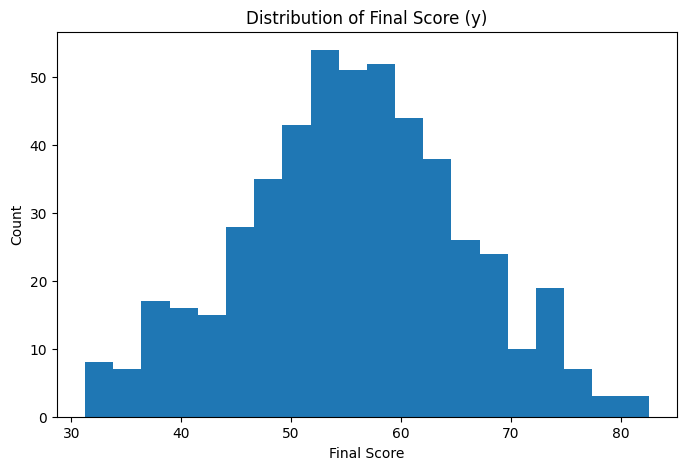

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(y, bins=20)
plt.title("Distribution of Final Score (y)")
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.show()



<b>Score is more or less normally distributed

### Outlier detection using IQR

In [ ]:
num_cols = X.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((X[col] < lower) | (X[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_summary = pd.Series(outlier_summary).sort_values(ascending=False)
print("\nOutlier count per feature (IQR method):")
print(outlier_summary)





Outlier count per feature (IQR method):
study_hours_per_week          0
attendance_percentage         0
previous_score                0
assignments_completed         0
total_assignments             0
sleep_hours                   0
class_participation           0
internet_quality              0
extracurricular_hours         0
assignment_completion_rate    0
dtype: int64


### Feature distributions (Univariate)

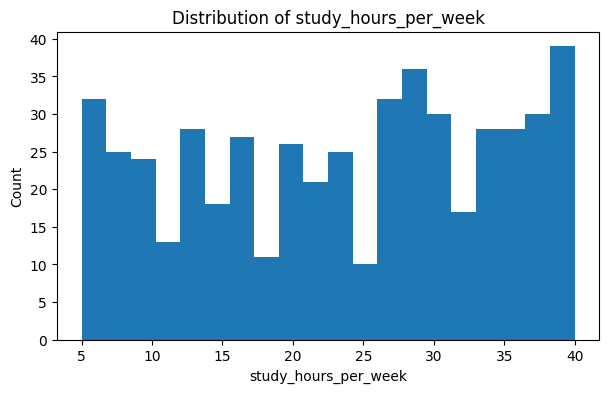

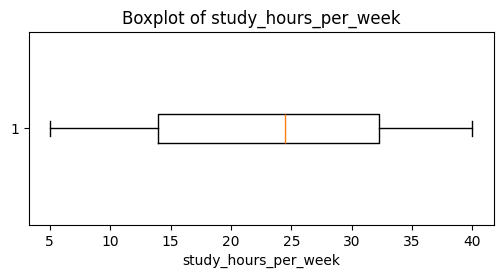

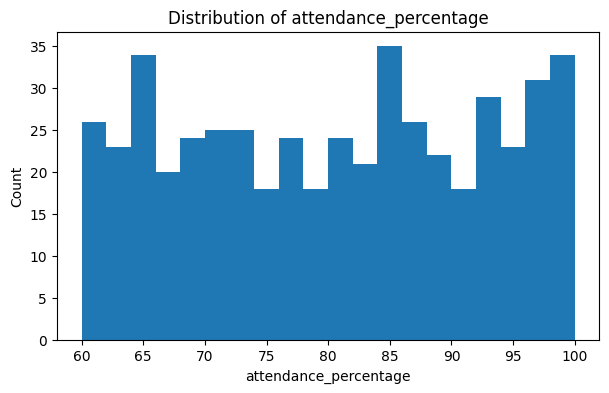

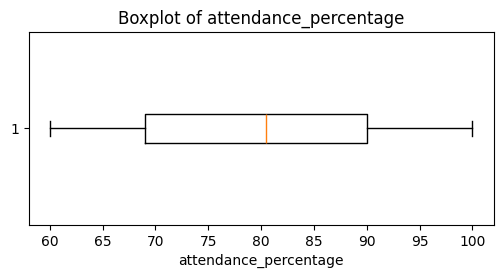

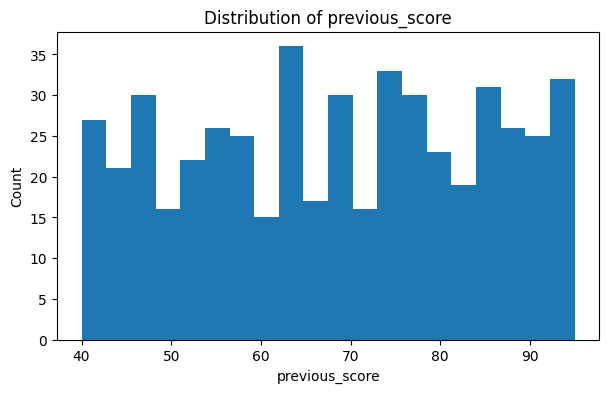

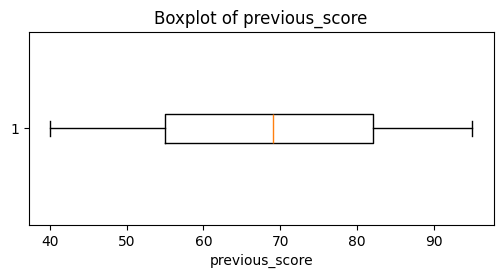

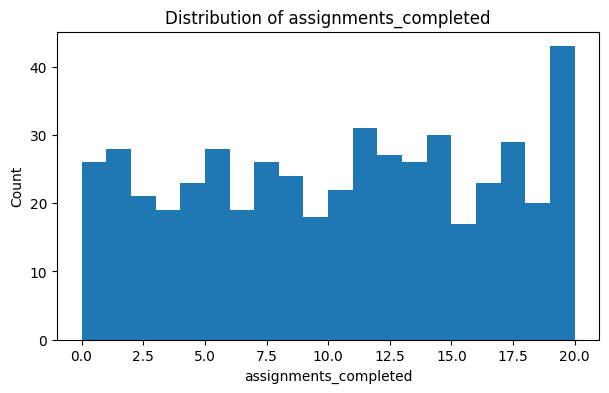

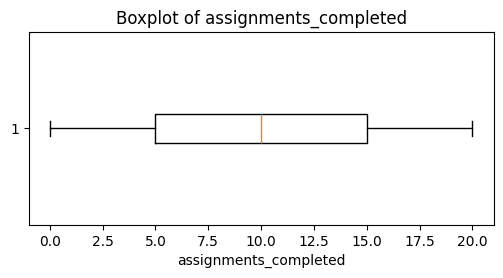

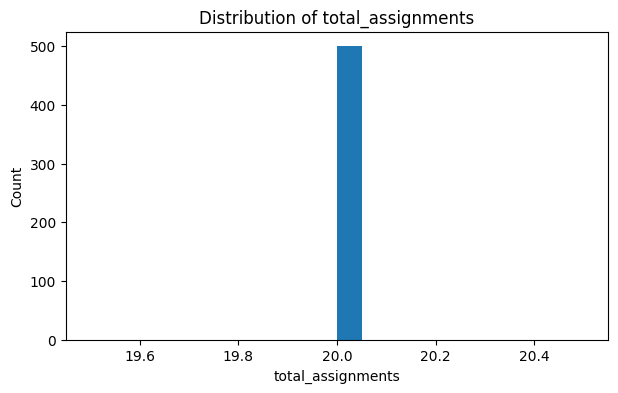

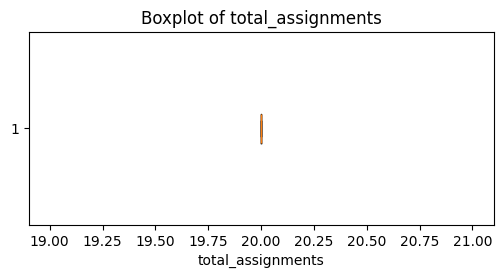

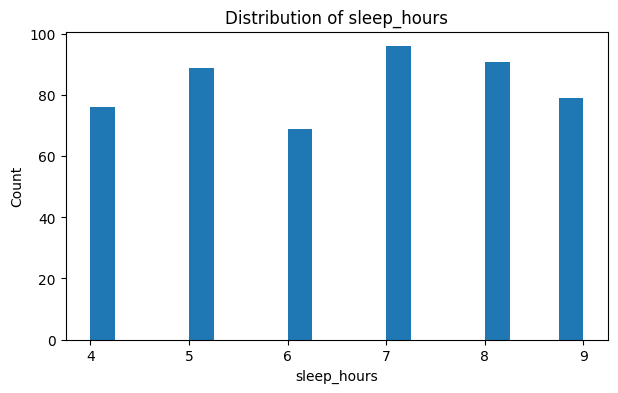

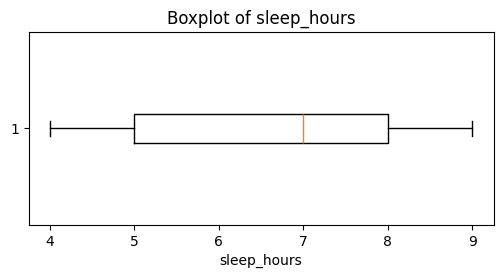

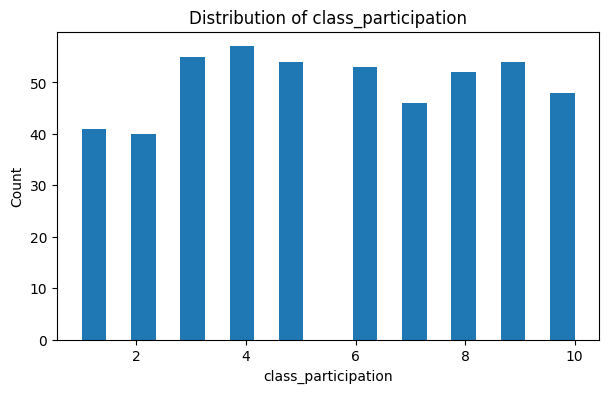

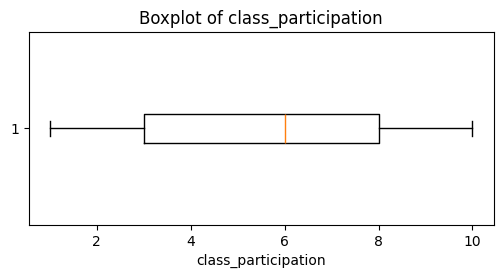

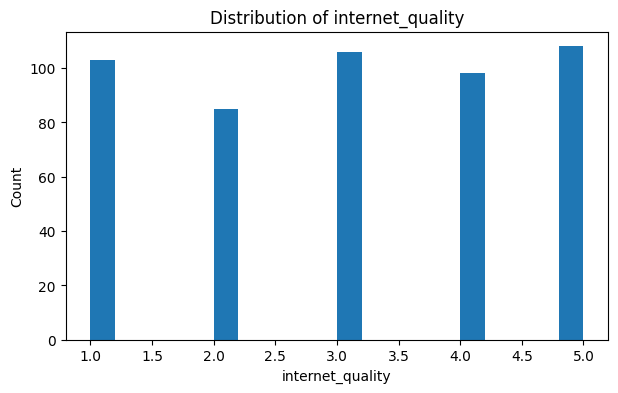

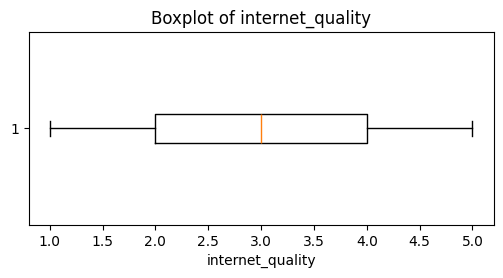

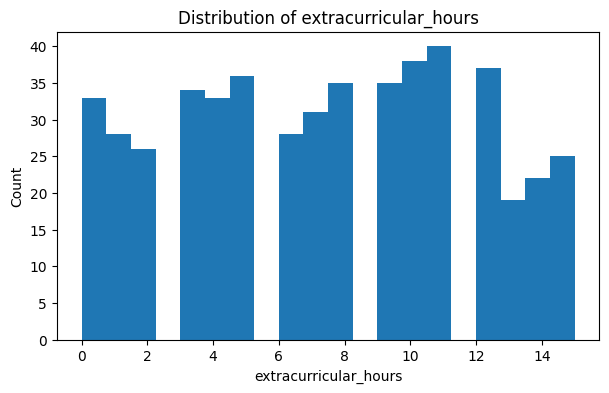

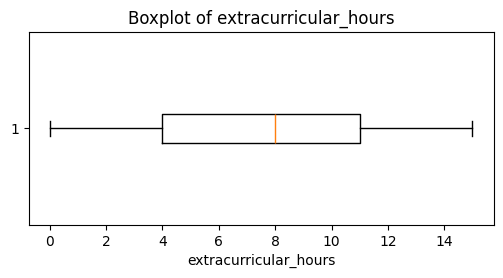

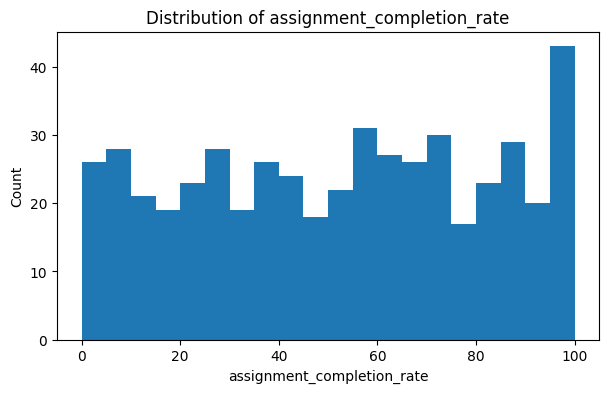

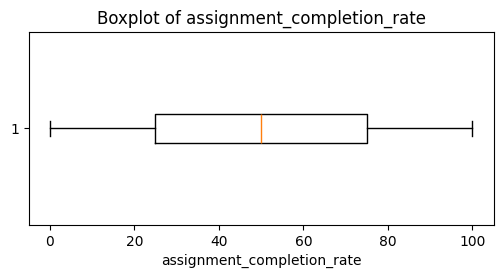

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    plt.hist(X[col], bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Boxplot for outliers
    plt.figure(figsize=(6,2.5))
    plt.boxplot(X[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()




### Correlation matrix

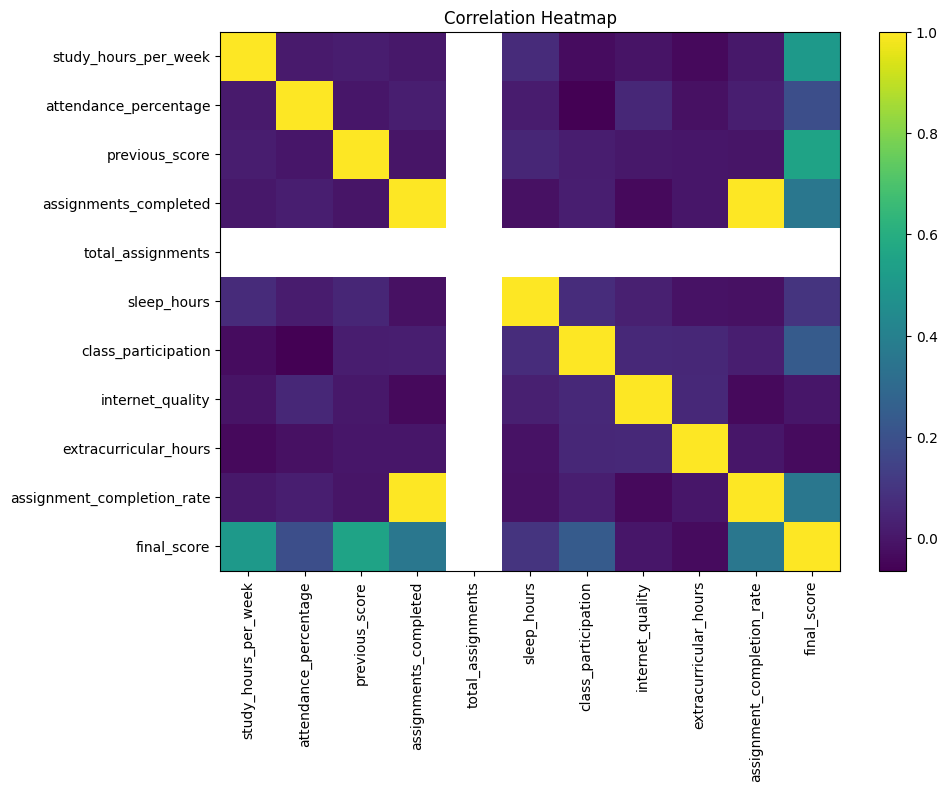


Correlation of features with final_score:
final_score                   1.000000
previous_score                0.555035
study_hours_per_week          0.505390
assignments_completed         0.356618
assignment_completion_rate    0.356618
class_participation           0.239948
attendance_percentage         0.192089
sleep_hours                   0.095387
internet_quality              0.001106
extracurricular_hours        -0.033539
total_assignments                  NaN
Name: final_score, dtype: float64


In [ ]:

corr_df = df.copy()
corr = corr_df.corr(numeric_only=True)

plt.figure(figsize=(10,7))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

print("\nCorrelation of features with final_score:")
print(corr["final_score"].sort_values(ascending=False))




total asignment being a constant value has no definable relation with others as it has 0 variance

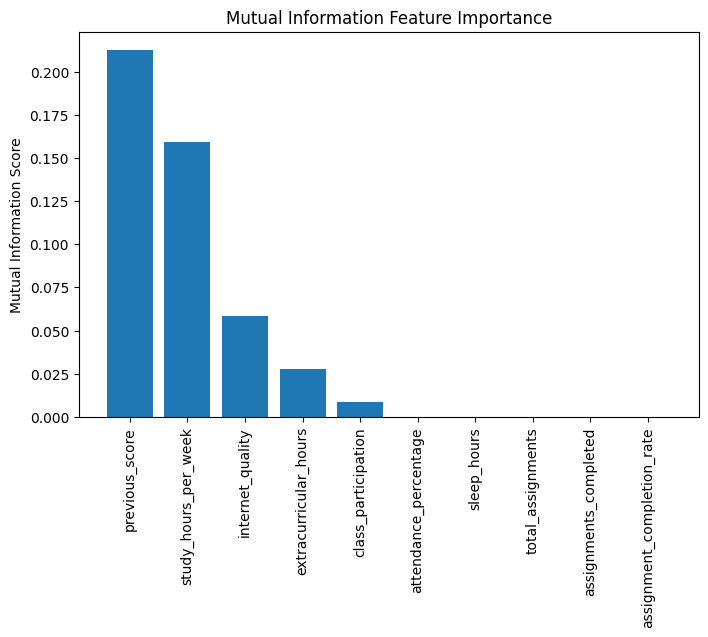


Mutual Information Scores:
previous_score                0.212518
study_hours_per_week          0.159464
internet_quality              0.058216
extracurricular_hours         0.027543
class_participation           0.008780
attendance_percentage         0.000000
sleep_hours                   0.000000
total_assignments             0.000000
assignments_completed         0.000000
assignment_completion_rate    0.000000
dtype: float64


In [ ]:
X_num = X.select_dtypes(include="number")

# Mutual Information (for regression target y)
mi_scores = mutual_info_regression(X_num, y, random_state=42)

mi_series = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(mi_series.index, mi_series.values)
plt.xticks(rotation=90)
plt.title("Mutual Information Feature Importance")
plt.ylabel("Mutual Information Score")
plt.show()

print("\nMutual Information Scores:")
print(mi_series)


Mutual Information analysis suggests that previous_score and study_hours_per_week are the most informative features for predicting final performance. Other variables show low or zero score, which may indicate either weak contribution or limitations of the MI estimator for current data. So we donot drop variables based on these

Since total assignment has 0 variance and no MI, we only drop this as it clearly doesnot contribute to the final_score

In [ ]:
df=df.drop('total_assignments',axis=1)

In [ ]:
df_final=df.copy()

In [ ]:
df_final.to_csv('student_performance_final.csv', index=False)